# Introducción

El objetivo principal de este proyecto es construir un modelo de aprendizaje profundo que clasifique imágenes en seis categorías relacionadas con escenas naturales: edificios, bosques, glaciares, montañas, mar y calles, sin embargo, más allá de este objetivo inicial, la relevancia de este modelo se extiende a aplicaciones prácticas específicas en áreas como la implementación de sistemas CAPTCHA avanzados, sistemas de navegación autónoma, y herramientas de monitoreo ambiental o urbano.

Un modelo investigando que me agradó fue el como implementar en este proyecto lo que podría ser particularmente útil en la creación de CAPTCHAs dinámicos basados en imágenes reales, por ejemplo, solicitando al usuario que seleccione todas las imágenes de una categoría específica (como "montañas" o "bosques"), por lo que, esta clasificación también tiene aplicaciones en la segmentación y reconocimiento de elementos visuales para sistemas de seguridad que requieren procesamiento de imágenes en tiempo real.

Para desarrollar esta solución, se seleccionó el dataset Intel Image Classification, que ofrece 25,000 imágenes de buena resolución (150x150 píxeles, ajustadas a 224x224 para el proyecto), ademas, este dataset es variado, balanceado, y suficientemente complejo para garantizar la robustez del modelo entrenado, por lo que, además, su enfoque en escenas naturales lo hace especialmente relevante para aplicaciones de análisis ambiental, clasificación de contenido visual en turismo, o sistemas inteligentes de clasificación en plataformas web.

La arquitectura diseñada para este proyecto se basa en redes neuronales convolucionales (CNN), con optimizaciones que incluyen técnicas de regularización, aumento de datos (Data Augmentation) y ajuste dinámico de la tasa de aprendizaje, además, estas mejoras garantizan una mayor capacidad de generalización del modelo, permitiendo su implementación en casos reales y su evaluación frente a datos no vistos, asegurando así un impacto práctico en el ámbito del reconocimiento visual automatizado.

Por utlimo se hace una demostración de pruebas de datos reales de imagenes sacadas de internet, de las cuales estan adjuntadas en github

In [ ]:
# Aquí subí el archivo kaggle.json que contiene mis credenciales para acceder a los datasets de Kaggle.
from google.colab import files
files.upload()  # Aquí profe, solicité el subir el archivo kaggle.json


Saving kagglejson.json to kagglejson.json


{'kagglejson.json': b'{"username":"oswaldo1212","key":"ae1f409f18ddb36a795c43e34886a524"}'}

In [ ]:
# aqui creé el directorio para Kaggle y esto hara que moverá el archivo de credenciales
!mkdir -p ~/.kaggle
!mv kagglejson.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Aqui nada mas se dercarga el dataset de Intel Image Classification que fue el que escogí
import kagglehub
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)


100%|██████████| 346M/346M [00:03<00:00, 99.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


## En esta sección me aseguré de analizar la organización del dataset, ya que tenía dificultades para identificar la ubicación de cada clase, por lo que dado que el dataset contiene una gran cantidad de imágenes distribuidas en varias carpetas, este paso fue necesario para comprender su estructura y poder avanzar con el modelo.

In [ ]:
import os
import pathlib

# Aquí exploré la estructura de directorios para verificar las carpetas de entrenamiento, prueba y predicción.
for folder in ['seg_train', 'seg_test', 'seg_pred']:
    try:
      # Defino aqui la ruta de cada carpeta para asegurarme de que exista en el dataset.
        folder_path = pathlib.Path(path) / folder
        print(f"\n{folder} contains the following categories:")
        if folder_path.exists():
            print(os.listdir(folder_path))
        else:
            print(f"Error: The folder '{folder}' does not exist in the specified path.")
    except Exception as e:
        print(f"An error occurred while processing {folder}: {e}")



seg_train contains the following categories:
['seg_train']

seg_test contains the following categories:
['seg_test']

seg_pred contains the following categories:
['seg_pred']


In [ ]:
import shutil
import os
from pathlib import Path

# Aqui lo que hago es solo definir las rutas de origen y destino
source_train = pathlib.Path(path) / "seg_train" / "seg_train"
dest_train = pathlib.Path(path) / "seg_train"

source_test = pathlib.Path(path) / "seg_test" / "seg_test"
dest_test = pathlib.Path(path) / "seg_test"

source_pred = pathlib.Path(path) / "seg_pred" / "seg_pred"
dest_pred = pathlib.Path(path) / "seg_pred"

# Aqui lo hago solo para mover las imagenes al nivel superior de seg_train
for category in os.listdir(source_train):
    shutil.move(str(source_train / category), dest_train)

# Lo mismo solo muevo las imagenes al nivel superior de seg_test
for category in os.listdir(source_test):
    shutil.move(str(source_test / category), dest_test)

# y por ultimo muevo estas imagenes al nivel superior de seg_pred
for category in os.listdir(source_pred):
    shutil.move(str(source_pred / category), dest_pred)

# Solamente esto lo hago para validar que no haya carpetas vacias y falle el entrenamiento
shutil.rmtree(source_train)
shutil.rmtree(source_test)
shutil.rmtree(source_pred)

print("Reorganización completa.")


Reorganización completa.


In [ ]:
import os
import pathlib

for folder in ['seg_train', 'seg_test', 'seg_pred']:
    print(f"\nChecking structure in {folder} folder:")
    path_to_check = pathlib.Path(path) / folder
    categories = os.listdir(path_to_check)

    # En seg_pred, por lo que vi en el dataset no hay subcarpetas, solo imágenes
    if folder == 'seg_pred':
        image_count = len([f for f in os.listdir(path_to_check) if f.endswith('.jpg')])
        print(f"{folder} contains {image_count} images")
    else:
        # Para 'seg_train' y 'seg_test', lo que hago será contar y validar las imágenes por categoría
        print("Categories found:", categories)
        for category in categories:
            category_path = path_to_check / category
            if category_path.is_dir():
                print(f"{category} contains {len(os.listdir(category_path))} images")



Checking structure in seg_train folder:
Categories found: ['sea', 'glacier', 'mountain', 'street', 'buildings', 'forest']
sea contains 2274 images
glacier contains 2404 images
mountain contains 2512 images
street contains 2382 images
buildings contains 2191 images
forest contains 2271 images

Checking structure in seg_test folder:
Categories found: ['sea', 'glacier', 'mountain', 'street', 'buildings', 'forest']
sea contains 510 images
glacier contains 553 images
mountain contains 525 images
street contains 501 images
buildings contains 437 images
forest contains 474 images

Checking structure in seg_pred folder:
seg_pred contains 7301 images


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

# Defino las rutas para los conjuntos de datos de entrenamiento y prueba
train_dir = pathlib.Path(path) / "seg_train"  # Aquí establezco la ruta para el conjunto de entrenamiento
test_dir = pathlib.Path(path) / "seg_test"    # Y aqui la ruta para el conjunto de prueba

# solamente cargo el dataset de entrenamiento y validación desde `seg_train` con una división
train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,  # Decido dividir el conjunto de entrenamiento en un 20% para validación
    subset="training",      # Especifico que esta parte es para entrenamiento
    seed=42,               # Uso una semilla para asegurar la reproducibilidad
    image_size=(224, 224), # Redimensiono las imágenes a 224x224 píxeles
    batch_size=32          # Establezco el tamaño del lote en 32
)

# Aquí cargo el dataset de validación
validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

# Cargamos el dataset de prueba
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224), # Redimensiono las imágenes a 224x224 píxeles
    batch_size=32          # Establezco el tamaño del lote en 32 para el conjunto de prueba
)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


# CARGA DE ARCHIVOS Y VISUALIZACIÓN DEL DATASET EJECUNTANDOSE EN COLAB

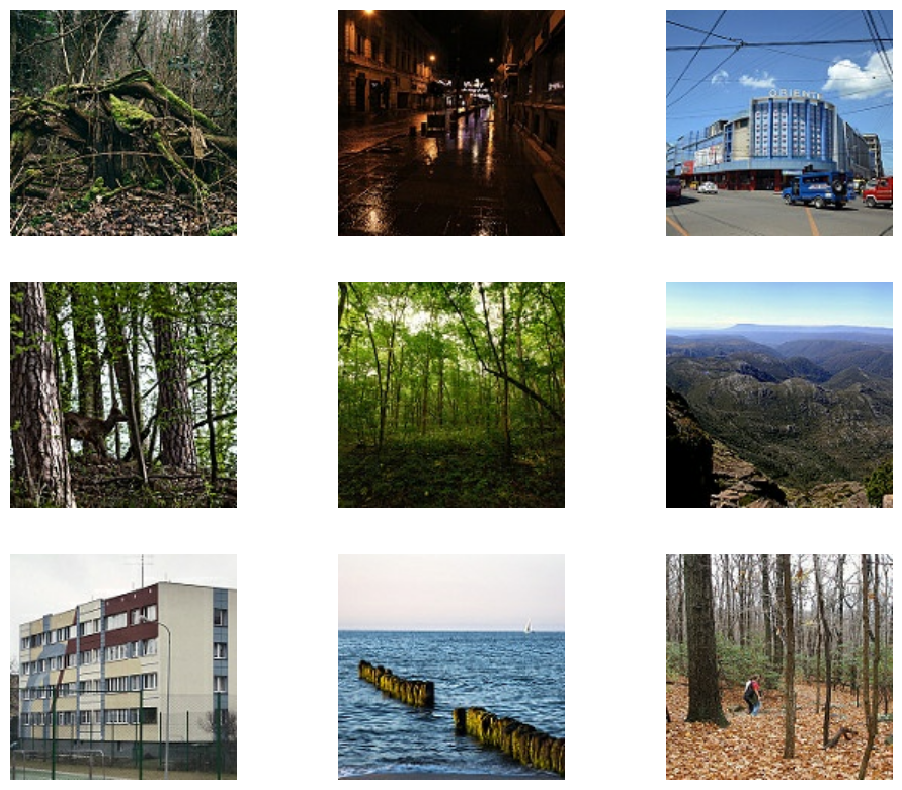

In [ ]:
import matplotlib.pyplot as plt

# Aqui unicamente es para observar las imágenes del conjunto de entrenamiento lo que son Building, Street
plt.figure(figsize=(12, 10))
index = 0
for element in train_dataset.take(1):  # Tomo un lote de entrenamiento de los que viene el dataset
    for i in range(9):  # Mostramos 9 imágenes
        image = element[0][i].numpy() / 255.0  # y aqui solo se normaliza los valores de la imagen
        index += 1
        plt.subplot(3, 3, index)
        plt.imshow(image, interpolation="nearest")
        plt.axis("off")

plt.show()


# ENTRENAMIENTO DEL MODELO PRUEBA 1

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Defino la arquitectura del modelo utilizando una red neuronal convolucional secuencial.
# El modelo comienza con una capa de entrada para imágenes de tamaño (224, 224, 3), seguida de
# tres bloques de capas convolucionales (con 32, 64 y 128 filtros) y MaxPooling
# para reducir las dimensiones espaciales de las características.

# Después de las capas convolucionales, lo que hago es mantener como las características y añado una capa densa intermedia
# con 128 neuronas y activación ReLU para capturar patrones complejos, y ya finalmente, la capa de salida
# tiene 6 neuronas, correspondientes al número de clases del dataset, con activación softmax para
# realizar la clasificación multicategoría.

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(224, 224, 3)))

model.add(keras.layers.Conv2D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=2))
model.add(keras.layers.Conv2D(64, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=2))
model.add(keras.layers.Conv2D(128, 3, activation='relu'))
model.add(keras.layers.MaxPooling2D(strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(6, activation='softmax'))

model.summary() # Muestro un resumen para asegurar que el modelo tiene la estructura adecuada.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Configuro el modelo para su entrenamiento, por lo que tilizo la función de pérdida 'sparse_categorical_crossentropy'
# porque las etiquetas están representadas como enteros en lugar de vectores.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Establezco un callback para guardar el mejor modelo basado en la pérdida de validación durante el entrenamiento.
# Esto asegura que siempre conserve el modelo con mejor desempeño para evitar sobreentrenamiento.

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_callback.keras", save_best_only=True, monitor="val_loss")
]

# Entreno el modelo usando el conjunto de datos de entrenamiento durante 10 épocas,
# validándolo con el conjunto de datos de validación en cada época, y ya
# también utilizo los callbacks para guardar automáticamente el mejor modelo.

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.3028 - loss: 54.3650 - val_accuracy: 0.4726 - val_loss: 1.3462
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.5037 - loss: 1.2478 - val_accuracy: 0.5520 - val_loss: 1.1363
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.5944 - loss: 0.9967 - val_accuracy: 0.5506 - val_loss: 1.1607
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6869 - loss: 0.7817 - val_accuracy: 0.5538 - val_loss: 1.1981
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.7684 - loss: 0.6014 - val_accuracy: 0.5513 - val_loss: 1.4688
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8310 - loss: 0.4501 - val_accuracy: 0.5577 - val_loss: 1.6738
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8729 - loss: 0.3418 - val_accuracy: 0.5310 - val_loss: 1.9977
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.9037 - loss: 0.2919 -

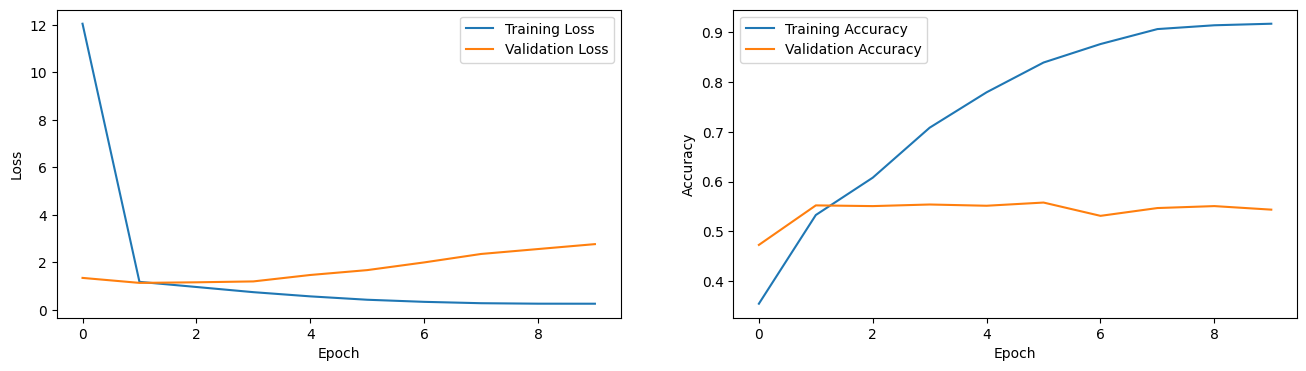

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5360 - loss: 2.8115
Test accuracy: 0.534


# Conclusion 1

Con estas gráficas, puedo ver que el modelo tiene un rendimiento decente, pero hay margen para mejorar, por lo que, la precisión en el conjunto de prueba está alrededor del 50-55%, lo que significa que el modelo tiene dificultades para generalizar correctamente, además, noto que la pérdida en validación deja de mejorar después de unas pocas épocas y se estabiliza, mientras que la precisión de entrenamiento sigue subiendo, ademas esto me hace pensar que el modelo está sobreajustando un poco los datos de entrenamiento.

Creo que este resultado es un buen punto de partida, pero siento que puedo intentar ajustar mejor los hiperparámetros, agregar regularización o tal vez usar más datos para ver si puedo mejorar la precisión y que no se estanque tan rápido en validación.

# **MEJORA**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

train_dir = pathlib.Path(path) / "seg_train"
test_dir = pathlib.Path(path) / "seg_test"

# Configuro el generador de datos con técnicas de Data Augmentation para el conjunto de entrenamiento.
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalizo los valores de los píxeles a un rango entre 0 y 1.
    rotation_range=20, # Permito rotaciones aleatorias de hasta 20 grados para las imágenes.
    width_shift_range=0.2, # Realizo desplazamientos horizontales aleatorios de hasta el 20% del ancho.
    height_shift_range=0.2, # Realizo desplazamientos verticales aleatorios de hasta el 20% del alto.
    shear_range=0.2, # Aplico transformaciones de cizalladura aleatorias.
    zoom_range=0.2, # Realizo zoom aleatorio dentro de un rango del 20%.
    horizontal_flip=True, # Permito voltear horizontalmente las imágenes.
    validation_split=0.2  # Divido los datos en un 80% para entrenamiento y 20% para validación.
)

# Genero el conjunto de entrenamiento a partir de las imágenes del directorio seg_train.
train_dataset = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse', # Utilizo el modo 'sparse' porque las etiquetas están en formato entero.
    subset='training' # Selecciono la parte de entrenamiento del conjunto de datos.
)

validation_dataset = datagen_train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Genero el conjunto de prueba desde el directorio seg_test.
datagen_test = ImageDataGenerator(rescale=1.0 / 255)
test_dataset = datagen_test.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Extraigo las categorías o clases de las imágenes desde el generador de entrenamiento.
categories = list(train_dataset.class_indices.keys())


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# Construyo el modelo mejorado con una arquitectura más profunda y optimizada.
modeloMejor = keras.models.Sequential([
    # Primera capa convolucional con 32 filtros y activación ReLU.
    keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"),  # Reduzco dimensionalidad con MaxPooling.

    # Segunda capa convolucional con 64 filtros y activación ReLU.
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"),

    # Tercera capa convolucional con 128 filtros.
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"),

    # Cuarta capa convolucional con 256 filtros.
    keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2, padding="same"),

    # Capa de pooling global para reducir dimensionalidad antes de las capas densas.
    keras.layers.GlobalAveragePooling2D(),

    # Capa densa con 256 unidades y activación ReLU.
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),  # Aplico dropout para prevenir sobreajuste.

    # Capa de salida con tantas unidades como clases en el dataset y activación softmax.
    keras.layers.Dense(len(categories), activation='softmax')
])

# Compilo el modelo utilizando sparse_categorical_crossentropy como función de pérdida.
modeloMejor.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',  # Uso el optimizador Adam.
    metrics=['accuracy']  # Metrizo el desempeño con la precisión.
)

# Configuro los callbacks para optimizar el entrenamiento del modelo.
checkpoint = ModelCheckpoint(filepath="modeloMejor.keras", save_best_only=True, monitor="val_loss")  # Guardo el mejor modelo.
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Paro temprano si no hay mejora.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)  # Reduzco la tasa de aprendizaje si el modelo se estanca.

# Entreno el modelo utilizando el conjunto de entrenamiento y validación.
history = modeloMejor.fit(
    train_dataset,
    epochs=25,  # Establezco 25 épocas como máximo.
    validation_data=validation_dataset,
    callbacks=[checkpoint, early_stopping, reduce_lr]  # Uso los callbacks definidos para optimizar el proceso.
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 208s 560ms/step - accuracy: 0.3439 - loss: 1.4801 - val_accuracy: 0.5556 - val_loss: 1.0814 - learning_rate: 0.0010
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 181s 509ms/step - accuracy: 0.5337 - loss: 1.1119 - val_accuracy: 0.6345 - val_loss: 0.9429 - learning_rate: 0.0010
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 208s 520ms/step - accuracy: 0.6178 - loss: 0.9567 - val_accuracy: 0.7115 - val_loss: 0.7838 - learning_rate: 0.0010
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 181s 506ms/step - accuracy: 0.6961 - loss: 0.8038 - val_accuracy: 0.7543 - val_loss: 0.6854 - learning_rate: 0.0010
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 177s 497ms/step - accuracy: 0.7326 - loss: 0.7237 - val_accuracy: 0.7589 - val_loss: 0.6625 - learning_rate: 0.0010
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 174s 486ms/step - accuracy: 0.7676 - loss: 0.6606 - val_accuracy: 0.7689 - val_loss: 0.6622 - learning_rate: 0.0010
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 166s 465ms/step - accuracy: 0.7691 

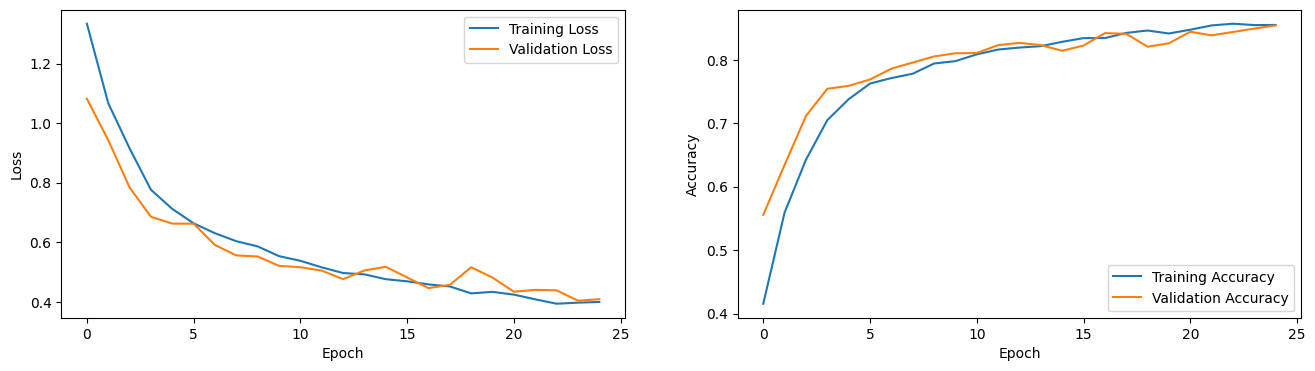

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = modeloMejor.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8627 - loss: 0.3814
Test accuracy: 0.870


# CONCLUSION 2

Aquí evalué el modelo mejorado, al cual le realicé varios ajustes importantes para resolver los problemas que noté en el modelo inicial, por lo que, decidí hacer la arquitectura más profunda añadiendo más capas convolucionales con mayores filtros que fueron 256 al final, lo que permitió al modelo aprender características más complejas de las imágenes, también incluí un Dropout al final, lo que ayudó a reducir el sobreajuste al forzar al modelo a no depender tanto de ciertas neuronas durante el entrenamiento.

Además, utilicé Data Augmentation para que el modelo entrenara con imágenes más variadas, por lo que, esto hizo que fuera más robusto ante variaciones como rotaciones, cambios de tamaño o desplazamientos, y técnicas como EarlyStopping ayudaron a detener el entrenamiento cuando ya no se veía una mejora, evitando gastar tiempo innecesario, y la reducción automática de la tasa de aprendizaje (ReduceLROnPlateau) ayudó al modelo a afinarse mejor en las últimas etapas del entrenamiento.

Estas técnicas funcionaron bien porque atacaron problemas específicos: el Dropout ayudó a evitar el sobreajuste, el Data Augmentation mejoró la capacidad del modelo de generalizar con datos nuevos, y los callbacks optimizaron el proceso de entrenamiento.

En las gráficas, se puede ver que tanto la pérdida como la precisión de entrenamiento y validación mejoran de manera consistente, ademas esto significa que el modelo está aprendiendo bien y no está sobreajustando, ya que ambas curvas son bastante cercanas, y ya al final, logré una precisión del 87% con los datos de prueba, lo cual es un gran salto comparado con el modelo inicial,  en general, los ajustes que implementé dieron buenos resultados y el modelo ahora tiene un mejor desempeño.

# FUNCIONALIDAD DEL MODELO

Por favor, selecciona hasta 6 imágenes para predecir:


Saving imagenbl.jpeg to imagenbl.jpeg
Saving imagenglr.PNG to imagenglr.PNG
Saving imagenmou.jpg to imagenmou.jpg
Saving imagenprueba.jpeg to imagenprueba.jpeg
Saving pruebastr.jpg to pruebastr.jpg
Saving sea.jpg to sea.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


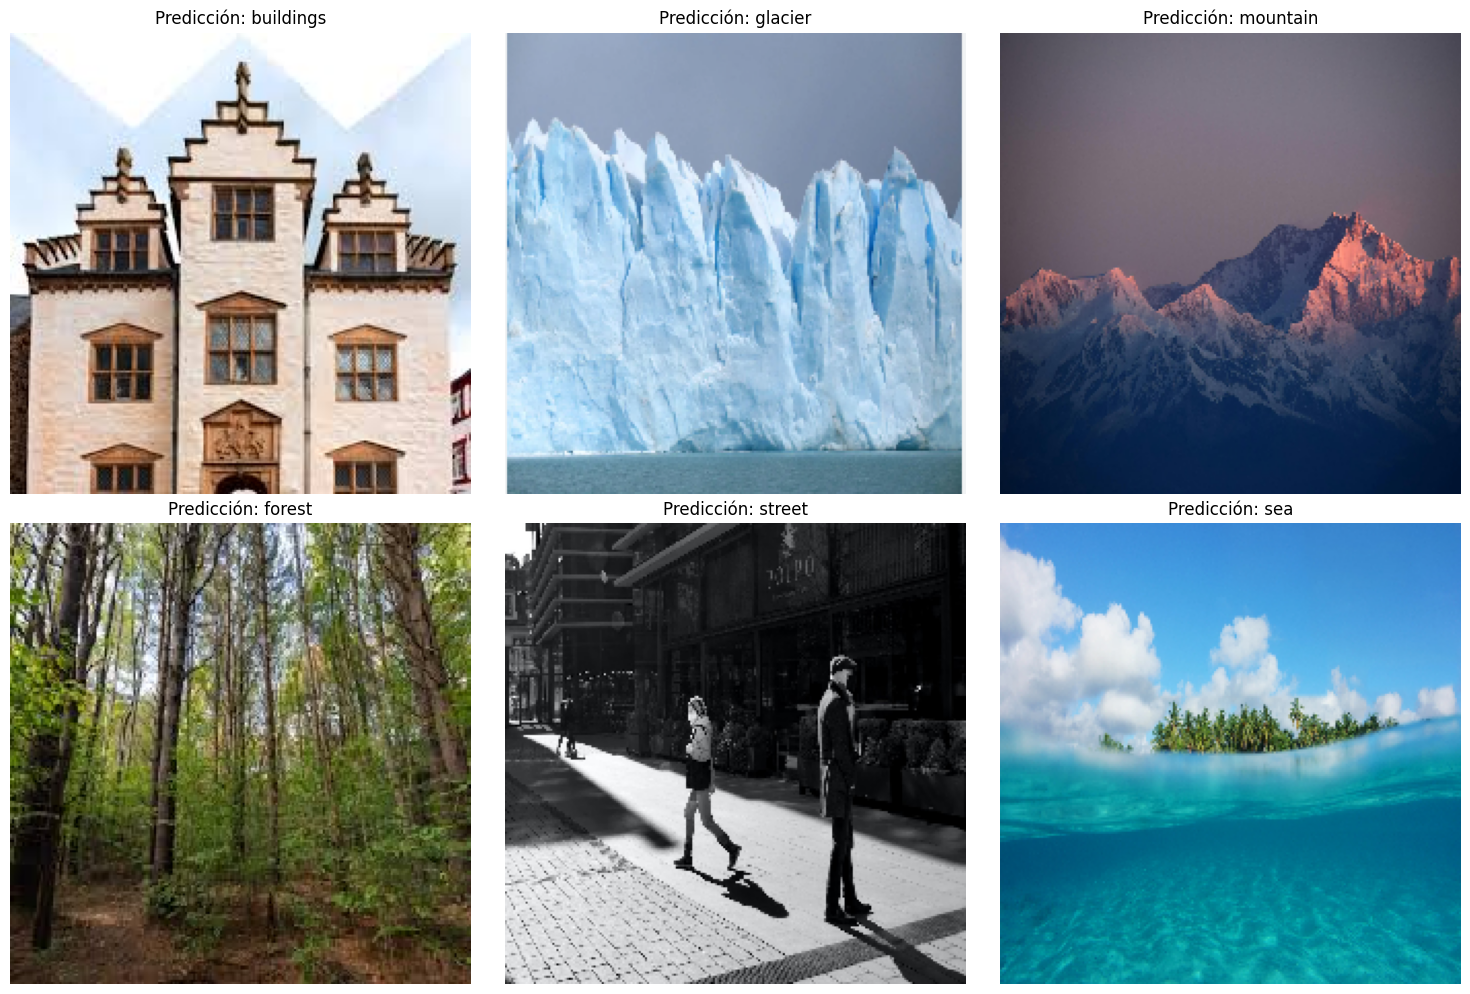

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Función para realizar predicciones
def predecir_imagen(ruta_imagen, modelo):
    # Aqui unicamente redimenciono la imagen
    img = image.load_img(ruta_imagen, target_size=(224, 224))

    # Lo que hago es convertir la imagen a un array y normalizar
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Hago la predicción
    prediccion = modelo.predict(img_array)
    clase_predicha = np.argmax(prediccion)  # Este es el indice de la clase con mayor probabilidad
    nombre_clase = categories[clase_predicha]  # Nombre de la clase predicha que saldra en la salida

    return nombre_clase, img

# Aqui solo es la funcion para que cargue las imagenes
print("Por favor, selecciona hasta 6 imágenes para predecir:")
uploaded = files.upload()

# Aqui se procesa y predice cada imagen
plt.figure(figsize=(15, 10))
for idx, (filename, filecontent) in enumerate(uploaded.items()):
    if idx >= 6:
        break

    with open(filename, 'wb') as f:
        f.write(filecontent)
    nombre_clase, img = predecir_imagen(filename, modeloMejor)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(f"Predicción: {nombre_clase}")

plt.tight_layout()
plt.show()
